In [1]:
mode = "LS" # LS or IS (latent/image)
ds = "p"

import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import numpy as np
from sklearn import metrics
utils_path = os.path.abspath(os.path.join('../../'))
if utils_path not in sys.path:
    sys.path.append(utils_path)
from utils.notebookutils import SimaseUSLatentDataset,SimaseUSVideoDataset, SiameseNetwork, model_forward_to_corrcoeff,model_forward_to_pred, model_forward_to_bin_pred, model_forward_to_corr_coeff
import torch
import json

normalization =lambda x: (x  - x.min())/(x.max() - x.min()) * 2 - 1  # should be -1 to 1 due to way we trained the model

#datasets
if mode == "LS": 
    ds_train_dynamic = SimaseUSLatentDataset(phase="training", transform=normalization, latents_csv="/vol/ideadata/at70emic/projects/TMI23/data/diffusion/dynamic/FileList.csv", training_latents_base_path="/vol/ideadata/at70emic/projects/TMI23/data/diffusion/dynamic/Latents", in_memory=False, generator_seed=0)
    ds_train_psax = SimaseUSLatentDataset(phase="training", transform=normalization, latents_csv= "/vol/ideadata/at70emic/projects/TMI23/data/diffusion/PSAX/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/projects/TMI23/data/diffusion/PSAX/Latents", in_memory=False, generator_seed=0)
    ds_train_a4c = SimaseUSLatentDataset(phase="training", transform=normalization, latents_csv="/vol/ideadata/at70emic/projects/TMI23/data/diffusion/A4C/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/projects/TMI23/data/diffusion/A4C/Latents", in_memory=False, generator_seed=0)

    ds_test_dynamic = SimaseUSLatentDataset(phase="testing", transform=normalization, latents_csv="/vol/ideadata/at70emic/projects/TMI23/data/diffusion/dynamic/FileList.csv", training_latents_base_path="/vol/ideadata/at70emic/projects/TMI23/data/diffusion/dynamic/Latents", in_memory=False, generator_seed=0)
    ds_test_psax = SimaseUSLatentDataset(phase="testing", transform=normalization, latents_csv= "/vol/ideadata/at70emic/projects/TMI23/data/diffusion/PSAX/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/projects/TMI23/data/diffusion/PSAX/Latents", in_memory=False, generator_seed=0)
    ds_test_a4c = SimaseUSLatentDataset(phase="testing", transform=normalization, latents_csv="/vol/ideadata/at70emic/projects/TMI23/data/diffusion/A4C/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/projects/TMI23/data/diffusion/A4C/Latents", in_memory=False, generator_seed=0)
else: 

    ds_test_dynamic = SimaseUSVideoDataset(phase="testing", transform=normalization, latents_csv="/vol/ideadata/at70emic/datasets/EchoNet-Dynamic/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/datasets/EchoNet-Dynamic/Videos", in_memory=False, generator_seed=0)
    ds_test_psax = SimaseUSVideoDataset(phase="testing", transform=normalization, latents_csv= "/vol/ideadata/at70emic/datasets/Echonet-Peds/PSAX/processed/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/datasets/Echonet-Peds/PSAX/processed/Videos", in_memory=False, generator_seed=0)
    ds_test_a4c = SimaseUSVideoDataset(phase="testing", transform=normalization, latents_csv="/vol/ideadata/at70emic/datasets/Echonet-Peds/A4C/processed/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/datasets/Echonet-Peds/A4C/processed/Videos", in_memory=False, generator_seed=0)

datasets_test = {"d": ds_test_dynamic, "p": ds_test_psax, "a": ds_test_a4c}
datasets_train = {"d": ds_train_dynamic, "p": ds_train_psax, "a": ds_train_a4c}
ds_name_to_name = {"d": "Dynamic", "p": "PSAX", "a": "A4C"}
basepath = "/vol/ideadata/at70emic/projects/TMI23/samples" 
syn_latents_path = {"d": os.path.join(basepath, "lidm_vpred/checkpoint-380000/ddim_64_100k/latents"),
                    "a": os.path.join(basepath, "lidm_vpred_peda4c/checkpoint-470000/ddpm_100k/latents"), 
                    "p": os.path.join(basepath, "lidm_vpred_pedpsax/checkpoint-420000/ddpm_100/latents")} 

#load models
models = {"a": None, "d": None, "p": None}
for model_name, model_ending in zip(["a", "d", "p"], ["a4c", "Dynamic", "psax"]): 
    model_basepath = f"/vol/ideadata/ed52egek/pycharm/privatis_us/archive/{model_ending}{mode}Best"
    with open(os.path.join(model_basepath, "config.json")) as config:
        config = config.read()

    # parse config
    config = json.loads(config)
    net = SiameseNetwork(network=config['siamese_architecture'], in_channels=config['n_channels'], n_features=config['n_features'])
    net = net.eval()
    net = net.cuda()
    best_name = [x for x in os.listdir(model_basepath) if x.endswith("best_network.pth")][0]
    net.load_state_dict(torch.load(os.path.join(model_basepath, best_name)))
    models[model_name] = net


/vol/ideadata/ed52egek/conda/latecho/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Set training dataset seed to 0
Set training dataset seed to 0
Set training dataset seed to 0
Set testing dataset seed to 0
Set testing dataset seed to 0
Set testing dataset seed to 0


/vol/ideadata/ed52egek/conda/latecho/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/vol/ideadata/ed52egek/conda/latecho/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
# image conditionals 
synthetic_image_datasets = {}

for dscur, synthetic_latent_path in syn_latents_path.items(): 
    if dscur != ds: 
        continue
    synthetic_images_paths = [x for x in os.listdir(synthetic_latent_path)]
    synthetic_images = [torch.load(os.path.join(synthetic_latent_path, x)) for x in synthetic_images_paths]

    # convert images to 1 x C x H x W to be consistent in case we want to check videos 
    for i in range(len(synthetic_images)): 
        if len(synthetic_images[i].size()) == 3: 
            synthetic_images[i] = synthetic_images[i].unsqueeze(dim=0)

    synthetic_images = normalization(torch.cat(synthetic_images))
    print(f"Number of synthetic images found for {ds_name_to_name[dscur]}: {len(synthetic_images)}")
    synthetic_image_datasets[dscur] = synthetic_images


Number of synthetic images found for PSAX: 100000


## Define how to sample images from training and validation videos
Each frame has to pass through the network so don't be wasteful

I **only take the first fram** technically it should not mattere in a video scenario  



In [3]:
from functools import partial
def first_frame(vid): 
    return vid[0:1]

def subsample(vid, every_nth_frame): 
    frames = np.arange(0, len(vid), step=every_nth_frame)
    return vid[frames]

train_vid_to_img = first_frame # partial(subsample, every_nth_frame=50)
test_vid_to_img = first_frame 

Dataset: PSAX
Number of real train frames: 3559
Number of real test frames: 519


Computing Synthetic Feature distances: 100%|██████████| 100000/100000 [00:12<00:00, 7933.14it/s]


Privacy threshold tau: 5.7148477077484126
Learned synthetic images: 963 = 0.27058162405169994 
vs. number of closest pairs between train and test set :  452 = 0.8709055876685935.
Memorized samples: 2670
Learned samples after applying privacy filter: 963


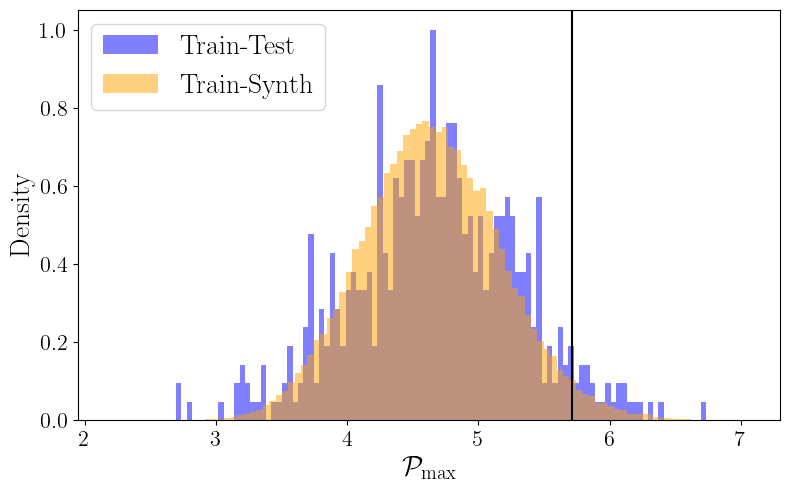

In [4]:
from tqdm import tqdm
from einops import repeat
import matplotlib.pyplot as plt
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

bs = 256
PRED_FUNCITON = "model_head"


print(f"Dataset: {ds_name_to_name[ds]}")
model = models[ds]
ds_train = datasets_train[ds]
ds_test = datasets_test[ds]
ds_synth = synthetic_image_datasets[ds]

train_images = torch.cat([train_vid_to_img(x) for x in ds_train])
test_images = torch.cat([test_vid_to_img(x) for x in ds_test])
print(f"Number of real train frames: {len(train_images)}")
print(f"Number of real test frames: {len(test_images)}")

feature_train = []
feature_test = []
feature_synth = []
with torch.no_grad():
    for i in tqdm(np.arange(0, len(train_images), bs), "Computing Train Feature Embeddings"):
        batch = train_images[i:i+bs].cuda()
        feature_train.append(model.forward_once(batch))

    for i in tqdm(np.arange(0, len(test_images), bs), "Computing Test Feature Embeddings"):
        batch = test_images[i:i+bs].cuda()
        feature_test.append(model.forward_once(batch))

    for i in tqdm(np.arange(0, len(synthetic_images), bs), "Computing Synthetic Feature Embeddings"):
        batch = synthetic_images[i:i+bs].cuda()
        feature_synth.append(model.forward_once(batch))

feature_train = torch.cat(feature_train)
feature_test = torch.cat(feature_test)
feature_synth = torch.cat(feature_synth)

if PRED_FUNCITON == "model_head": 
    prediction_function = model.prediction_head_forward

max_scores_test = []
argmax_scores_test = []
with torch.no_grad(): 
    for i in tqdm(range(len(feature_test)), "Computing test feature distances"):
        latent_synth_image = repeat(feature_test[i:i+1], "1 h -> b h", b=len(feature_train))
        predictions = prediction_function(latent_synth_image, feature_train).cpu()
        max_scores_test.append(predictions.max())
        argmax_scores_test.append(predictions.argmax())


max_scores_synth = []
argmax_scores_synth = []
with torch.no_grad(): 
    for i in tqdm(range(len(feature_synth)), "Computing Synthetic Feature distances"):
        latent_synth_image = repeat(feature_synth[i:i+1], "1 h -> b h", b=len(feature_train))
        predictions = prediction_function(latent_synth_image, feature_train).cpu()
        max_scores_synth.append(predictions.max())
        argmax_scores_synth.append(predictions.argmax())

# Computing tau
tau = np.percentile(torch.stack(max_scores_test).numpy(), 95)
print(f"Privacy threshold tau: {tau}")

learned_synth = set([float(x) for x in argmax_scores_synth])
learned_test = set([float(x) for x in argmax_scores_test])
print(f"Learned synthetic images: {len(learned_synth)} = {len(learned_synth) / min(len(feature_train), len(feature_synth))} \n" + 
                                                        f"vs. number of closest pairs between train and test set :  {len(learned_test)} = {len(learned_test) / min(len(feature_train), len(feature_test))}.")

print(f"Memorized samples: {sum(max_scores_synth > tau)}")
print(f"Learned samples after applying privacy filter: {len(torch.stack(argmax_scores_synth).squeeze()[torch.stack(max_scores_synth).squeeze() < tau].unique())}")

density = True
fig, ax = plt.subplots(figsize=(8, 5))
nt, bins, patches = ax.hist(max_scores_test, 100, density=density, label="Train-Test", alpha=0.5, color="blue")
ns, bins, patches = ax.hist(max_scores_synth, 100, density=density, label="Train-Synth", alpha=.5, color="orange")
ax.axvline(tau, 0, max(max(nt), max(ns)), color="black")
ax.set_xlabel(r'$\mathcal{P}_{\text{max}}$', fontsize=20)
ax.set_ylabel('Density', fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=16)

# Tweak spacing to prevent clipping of ylabel
plt.legend(fontsize=20)
fig.tight_layout()
plt.savefig(f"privacy_results_{ds_name_to_name[ds]}_predfunction_{PRED_FUNCITON}.pdf", dpi=600)
plt.show()


Image with most appearances has: 1414 appearances


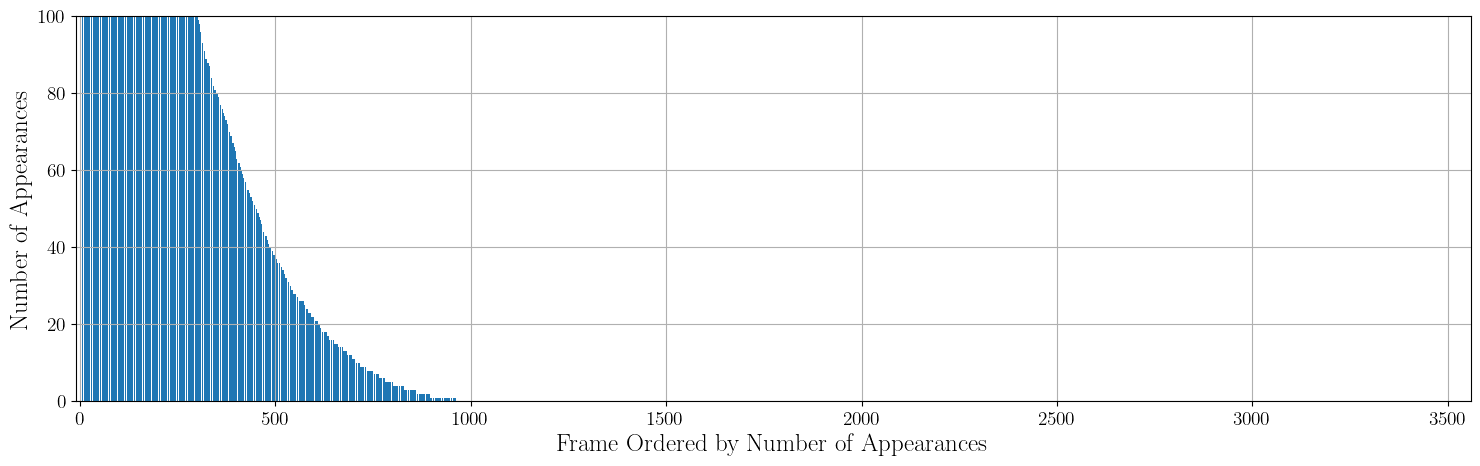

In [31]:
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

fig, ax = plt.subplots(figsize=(18, 5))

learned_synth = pd.Series([float(x) for x in argmax_scores_synth])
vals = learned_synth.value_counts().reset_index()
print(f"Image with most appearances has: {vals['count'][0]} appearances")
ax.grid(True)
ol = ax.bar(np.arange(len(vals)), vals["count"])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim(0, 100)#max(vals["count"]))
ax.set_xlim(-10, len(ds_train))
ax.set_ylabel('Number of Appearances', fontsize=18)
ax.set_xlabel('Frame Ordered by Number of Appearances', fontsize=18)
plt.savefig(f"{ds_name_to_name[ds]}_appearances.png", dpi=600)
plt.show()


In [6]:
argmax_scores_synth

[tensor(3463),
 tensor(3167),
 tensor(2675),
 tensor(3010),
 tensor(1760),
 tensor(401),
 tensor(55),
 tensor(2193),
 tensor(769),
 tensor(58),
 tensor(1731),
 tensor(3021),
 tensor(1408),
 tensor(453),
 tensor(1647),
 tensor(3203),
 tensor(2484),
 tensor(2518),
 tensor(3266),
 tensor(1173),
 tensor(3056),
 tensor(3304),
 tensor(3083),
 tensor(1903),
 tensor(3304),
 tensor(1590),
 tensor(2888),
 tensor(3211),
 tensor(2049),
 tensor(29),
 tensor(2430),
 tensor(405),
 tensor(156),
 tensor(428),
 tensor(1927),
 tensor(1121),
 tensor(175),
 tensor(156),
 tensor(2905),
 tensor(2954),
 tensor(2384),
 tensor(746),
 tensor(1608),
 tensor(2372),
 tensor(2288),
 tensor(2138),
 tensor(2847),
 tensor(904),
 tensor(3036),
 tensor(1812),
 tensor(2396),
 tensor(158),
 tensor(1676),
 tensor(3262),
 tensor(577),
 tensor(319),
 tensor(947),
 tensor(1046),
 tensor(175),
 tensor(156),
 tensor(3370),
 tensor(2749),
 tensor(577),
 tensor(1423),
 tensor(1723),
 tensor(2122),
 tensor(405),
 tensor(1574),
 ten

In [7]:
#torch.stack(argmax_scores_synth).squeeze()[torch.stack(max_scores_synth).squeeze() < tau]
df = pd.DataFrame({"closest": [int(x) for x in argmax_scores_synth], "canbeshared":[bool(x) for x in list(torch.stack(max_scores_synth).squeeze() < tau)]})
df

,closest,canbeshared
0,3463,True
1,3167,True
2,2675,True
3,3010,True
4,1760,True
...,...,...
99995,3154,True
99996,3395,True
99997,3532,True
99998,3215,True


In [8]:
df_canbeshared = df[df["canbeshared"]].sample(frac=1.0)
df_synth_train = df_canbeshared.drop_duplicates(subset="closest")

train_vids = list(df_synth_train.index)
print(f"Number of train vids: {len(train_vids)} that we take from the train dataset with index: {str(train_vids[:5])[:-1]} ...")

df_synth_train

Number of train vids: 963 that we take from the train dataset with index: [87110, 62129, 2937, 24559, 1248 ...


,closest,canbeshared
87110,1928,True
62129,175,True
2937,640,True
24559,3019,True
1248,3425,True
...,...,...
85893,1449,True
83294,1059,True
66689,2809,True
79858,478,True


In [9]:
# Group by "closest" and sample up to 5 rows from each group
df_canbeshared["index"] = df_canbeshared.index 
df_synth_aug = df_canbeshared.groupby('closest').apply(lambda x: x.sample(min(len(x), 5))).reset_index(drop=True).set_index("index")
print(f"Size of augmented dataset where each train video only occurs at maximum 5 times: {len(df_synth_aug)}")
df_synth_aug


Size of augmented dataset where each train video only occurs at maximum 5 times: 4352


,closest,canbeshared
index,,
16555,1,True
17040,1,True
61996,1,True
93976,1,True
77011,1,True
...,...,...
5971,3553,True
13812,3553,True
95800,3553,True


In [10]:
train_ds = datasets_train[ds]
train_filelist = train_ds.df
closest = list(df_canbeshared["closest"].unique())
closest = sorted(closest)
not_closest = [x for x in np.arange(len(train_ds)) if x not in closest]
not_closest
not_closest_filenames = list(train_filelist.iloc[not_closest]["FileName"])
not_closest_filenames[:4]

['CR32a7555-CR32a7582-000027',
 'CR32a7555-CR32a97e1-000009',
 'CR32a7555-CR32a9850-000035',
 'CR32a7555-CR32a988d-000025']

## Copy Real data but limited to a smaller subset

In [12]:
from tqdm import tqdm
import shutil
real_vids_paths = {
    "d":"/vol/ideadata/at70emic/datasets/EchoNet-Dynamic/Videos",
    "p":"/vol/ideadata/at70emic/datasets/Echonet-Peds/PSAX/processed/Videos",
    "a": "/vol/ideadata/at70emic/datasets/Echonet-Peds/A4C/processed/Videos"}

out_base_dir = "/vol/ideadata/ed52egek/pycharm/privatis_us/new_datasets"
out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/real")
os.makedirs(out_dir, exist_ok=True)

full_ds = pd.read_csv(os.path.join(os.path.dirname(real_vids_paths[ds]), "FileList.csv"))
new_train_ds_real = full_ds[~full_ds['FileName'].isin(not_closest_filenames)].reset_index(drop=True)
new_train_ds_real.to_csv(os.path.join(out_dir, "FileList.csv"))
print(new_train_ds_real.Split.value_counts())

os.makedirs(os.path.join(out_dir, f"Videos"), exist_ok=True)
data_base_path = real_vids_paths[ds]
for filename in tqdm(new_train_ds_real["FileName"], "Copying files to new training dir"): 
    if not filename.endswith(".avi"): 
        filename += ".avi" 
    shutil.copy(os.path.join(data_base_path, f"{filename}"), os.path.join(out_dir, f"Videos/{filename}"))

Split
TRAIN    3559
TEST      519
VAL       448
Name: count, dtype: int64


Copying files to new training dir: 100%|██████████| 4526/4526 [00:21<00:00, 213.26it/s]


## Copy synthetic data but limited to a smaller subset equal to that of the size of the real dataset

In [13]:
from tqdm import tqdm
import shutil
syn_vids_paths = {
    "d":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_dynamic_syn/",
    "p":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_psax_syn/",
    "a": "/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_a4c_syn/"}

out_base_dir = "/vol/ideadata/ed52egek/pycharm/privatis_us/new_datasets"
out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/real")
os.makedirs(out_dir, exist_ok=True)

full_syn_ds = pd.read_csv(os.path.join(syn_vids_paths[ds], "FileList.csv"))
full_syn_ds

new_train_ds_syn = full_syn_ds[full_syn_ds['FileName'].map(lambda x: int(x[7:])).isin(list(df_synth_train.index))].reset_index(drop=True)
new_train_ds_syn


,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
0,sample_000019,26,0,0,128,112,32,8,TRAIN
1,sample_000226,77,0,0,128,112,32,8,TRAIN
2,sample_000397,12,0,0,128,112,32,8,TRAIN
3,sample_000486,12,0,0,128,112,32,8,TRAIN
4,sample_000592,75,0,0,128,112,32,8,TRAIN
...,...,...,...,...,...,...,...,...,...
958,sample_099593,52,0,0,128,112,32,8,TRAIN
959,sample_099616,64,0,0,128,112,32,8,TRAIN
960,sample_099662,38,0,0,128,112,32,8,TRAIN
961,sample_099760,68,0,0,128,112,32,8,TRAIN


In [14]:
#train_vids
df_val_synth = df_canbeshared[~df_canbeshared["index"].isin(train_vids)].drop_duplicates(subset="closest")
print(f"Number of validation images: {len(df_val_synth)}")
df_val_synth

Number of validation images: 897


,closest,canbeshared,index
47517,228,True,47517
70474,1903,True,70474
69608,3526,True,69608
40045,1927,True,40045
21537,1821,True,21537
...,...,...,...
38854,3256,True,38854
30333,119,True,30333
74139,262,True,74139
6994,3003,True,6994


In [15]:
new_test_ds_syn = full_ds[full_ds.Split == "TEST"] # testing on real images
print(f"Testing on real images. Number of test images: {len(new_test_ds_syn)}")

Testing on real images. Number of test images: 519


In [16]:
new_val_ds_syn = full_syn_ds[full_syn_ds['FileName'].map(lambda x: int(x[7:])).isin(list(df_val_synth.index))].reset_index(drop=True)
new_val_ds_syn["Split"] = "VAL"
new_val_ds_syn

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
0,sample_000110,19,0,0,128,112,32,8,VAL
1,sample_000152,26,0,0,128,112,32,8,VAL
2,sample_000290,26,0,0,128,112,32,8,VAL
3,sample_000344,26,0,0,128,112,32,8,VAL
4,sample_000371,72,0,0,128,112,32,8,VAL
...,...,...,...,...,...,...,...,...,...
892,sample_099253,69,0,0,128,112,32,8,VAL
893,sample_099639,84,0,0,128,112,32,8,VAL
894,sample_099642,48,0,0,128,112,32,8,VAL
895,sample_099775,76,0,0,128,112,32,8,VAL


In [17]:
new_test_ds_syn = full_ds[full_ds.Split == "TEST"] # testing on real images
new_full_ds_syn = pd.concat([new_train_ds_syn, new_val_ds_syn, new_test_ds_syn])
print(new_full_ds_syn.Split.value_counts())

new_full_ds_syn

Split
TRAIN    963
VAL      897
TEST     519
Name: count, dtype: int64


,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split,Sex,Age,Weight,Height,KFOLD
0,sample_000019,26.00,0.0,0.0,128.0,112.0,32.0,8.0,TRAIN,NaN,NaN,NaN,NaN,NaN
1,sample_000226,77.00,0.0,0.0,128.0,112.0,32.0,8.0,TRAIN,NaN,NaN,NaN,NaN,NaN
2,sample_000397,12.00,0.0,0.0,128.0,112.0,32.0,8.0,TRAIN,NaN,NaN,NaN,NaN,NaN
3,sample_000486,12.00,0.0,0.0,128.0,112.0,32.0,8.0,TRAIN,NaN,NaN,NaN,NaN,NaN
4,sample_000592,75.00,0.0,0.0,128.0,112.0,32.0,8.0,TRAIN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,CR4884e9a-CR4884eca-000054.avi,59.08,NaN,NaN,NaN,NaN,NaN,NaN,TEST,M,16.0,87.3,161.4,9.0
4498,CR4884e9c-CR4884ecc-000028.avi,59.16,NaN,NaN,NaN,NaN,NaN,NaN,TEST,M,16.0,50.0,170.0,9.0
4503,CR4884ea1-CR4884ee4-000045.avi,59.61,NaN,NaN,NaN,NaN,NaN,NaN,TEST,F,17.0,50.0,157.0,9.0
4506,CR4884ea4-CR4884ef0-000025.avi,59.04,NaN,NaN,NaN,NaN,NaN,NaN,TEST,M,18.0,67.0,183.0,9.0


In [18]:
out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/syn")
os.makedirs(os.path.join(out_dir, f"Videos"), exist_ok=True)
real_data_base_path = real_vids_paths[ds]
syn_data_base_path = syn_vids_paths[ds]
new_full_ds_syn.to_csv(os.path.join(out_dir, "FileList.csv"))
for filename, split in tqdm(zip(new_full_ds_syn["FileName"], new_full_ds_syn["Split"]), "Copying files to new training dir"): 
    if not filename.endswith(".avi"): 
        filename += ".avi" 

    if split == "TEST": 
        shutil.copy(os.path.join(real_data_base_path, f"{filename}"), os.path.join(out_dir, f"Videos/{filename}"))
    else: 
        shutil.copy(os.path.join(syn_data_base_path, f"avi/{filename}"), os.path.join(out_dir, f"Videos/{filename}"))

    

Copying files to new training dir: 0it [00:00, ?it/s]

Copying files to new training dir: 2379it [00:11, 215.60it/s]


## Same but this time pretend we are augmenting by sampling each video five times

In [19]:
from tqdm import tqdm
import shutil
syn_vids_paths = {
    "d":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_dynamic_syn/",
    "p":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_psax_syn/",
    "a": "/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_a4c_syn/"}

out_base_dir = "/vol/ideadata/ed52egek/pycharm/privatis_us/new_datasets"
out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/real")
os.makedirs(out_dir, exist_ok=True)

full_syn_ds = pd.read_csv(os.path.join(syn_vids_paths[ds], "FileList.csv"))
full_syn_ds

new_train_ds_syn = full_syn_ds[full_syn_ds['FileName'].map(lambda x: int(x[7:])).isin(list(df_synth_aug.index))].reset_index(drop=True)
new_train_ds_syn


new_full_ds_syn = pd.concat([new_train_ds_syn, new_val_ds_syn, new_test_ds_syn])
print(new_full_ds_syn.Split.value_counts())

new_full_ds_syn


out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/synaug")
os.makedirs(os.path.join(out_dir, f"Videos"), exist_ok=True)
real_data_base_path = real_vids_paths[ds]
syn_data_base_path = syn_vids_paths[ds]
new_full_ds_syn.to_csv(os.path.join(out_dir, "FileList.csv"))
for filename, split in tqdm(zip(new_full_ds_syn["FileName"], new_full_ds_syn["Split"]), "Copying files to new training dir"): 
    if not filename.endswith(".avi"): 
        filename += ".avi" 
    if split == "TEST": 
        shutil.copy(os.path.join(real_data_base_path, f"{filename}"), os.path.join(out_dir, f"Videos/{filename}"))
    else: 
        shutil.copy(os.path.join(syn_data_base_path, f"avi/{filename}"), os.path.join(out_dir, f"Videos/{filename}"))



Split
TRAIN    4352
VAL       897
TEST      519
Name: count, dtype: int64


Copying files to new training dir: 5768it [00:25, 225.93it/s]


# Baseline Datasets 

Compute the FileList and the folder for the baseline datasets. The first one contains all private videos, 1288 of which we use for validation (same as real train dataset) this is called **synaugmented**

Additionally, we compute a Filelist and folder with the same size as the original train dataset. We call this **syn**

### Find validation dataset for both 


In [23]:
df_syn_all_val = df_canbeshared.sample(full_ds.Split.value_counts()["VAL"])
df_syn_all_train = df_canbeshared[~df_canbeshared.isin(df_syn_all_val)]

df_syn_rdm_train = df_syn_all_train.sample(len(ds_train))

print(f"Number of videos in synthetic 'all' train dataset {len(df_syn_all_train)}")
print(f"Number of videos in synthetic 'all' val dataset {len(df_syn_all_val)}")
print(f"Number of videos in synthetic 'rdm' dataset {len(df_syn_rdm_train)}")
df_syn_rdm_train.head(5)

Number of videos in synthetic 'all' train dataset 97330
Number of videos in synthetic 'all' val dataset 448
Number of videos in synthetic 'rdm' dataset 3559


,closest,canbeshared,index
86758,483.0,True,86758.0
7018,266.0,True,7018.0
62253,1206.0,True,62253.0
26086,1927.0,True,26086.0
49443,216.0,True,49443.0


In [25]:
new_val_ds_syn_full = full_syn_ds[full_syn_ds['FileName'].map(lambda x: int(x[7:])).isin(list(df_syn_all_val.index))].reset_index(drop=True) 
new_val_ds_syn_full["Split"] = "VAL"
new_val_ds_syn_full

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
0,sample_000090,79,0,0,128,112,32,8,VAL
1,sample_000214,51,0,0,128,112,32,8,VAL
2,sample_000321,39,0,0,128,112,32,8,VAL
3,sample_000390,79,0,0,128,112,32,8,VAL
4,sample_000674,22,0,0,128,112,32,8,VAL
...,...,...,...,...,...,...,...,...,...
443,sample_098978,64,0,0,128,112,32,8,VAL
444,sample_099565,87,0,0,128,112,32,8,VAL
445,sample_099632,78,0,0,128,112,32,8,VAL
446,sample_099709,18,0,0,128,112,32,8,VAL


## Synaug

In [29]:
from tqdm import tqdm
import shutil
#out_base_dir = "/vol/ideadata/ed52egek/pycharm/privatis_us/new_datasets"
syn_vids_paths = {
    "d":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_dynamic_syn/",
    "p":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_psax_syn/",
    "a": "/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_a4c_syn/"}


out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/full/synaug")
os.makedirs(os.path.join(out_dir, f"Videos"), exist_ok=True)

full_syn_ds = pd.read_csv(os.path.join(syn_vids_paths[ds], "FileList.csv"))
full_syn_ds # all 100k vids

new_train_ds_full_synaug = full_syn_ds[full_syn_ds['FileName'].map(lambda x: int(x[7:])).isin(list(df_syn_all_train.index))].reset_index(drop=True)
new_train_ds_full_synaug


new_full_ds_syn = pd.concat([new_train_ds_full_synaug, new_val_ds_syn_full, new_test_ds_syn])
print(new_full_ds_syn.Split.value_counts())
new_full_ds_syn

real_data_base_path = real_vids_paths[ds]
syn_data_base_path = syn_vids_paths[ds]
new_full_ds_syn.to_csv(os.path.join(out_dir, "FileList.csv"))
for filename, split in tqdm(zip(new_full_ds_syn["FileName"], new_full_ds_syn["Split"]), "Copying files to new training dir", total=len(new_full_ds_syn)): 
    if not filename.endswith(".avi"): 
        filename += ".avi" 
    if split == "TEST": 
        shutil.copy(os.path.join(real_data_base_path, f"{filename}"), os.path.join(out_dir, f"Videos/{filename}"))
    else: 
        shutil.copy(os.path.join(syn_data_base_path, f"avi/{filename}"), os.path.join(out_dir, f"Videos/{filename}"))


Split
TRAIN    97330
TEST       519
VAL        448
Name: count, dtype: int64


Copying files to new training dir: 100%|██████████| 98297/98297 [13:22<00:00, 122.41it/s]


# Now we only use as many videos as we would use for training with the real dataset

In [30]:
from tqdm import tqdm
import shutil
#out_base_dir = "/vol/ideadata/ed52egek/pycharm/privatis_us/new_datasets"
syn_vids_paths = {
    "d":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_dynamic_syn/",
    "p":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_psax_syn/",
    "a": "/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_a4c_syn/"}


out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/full/syn")
os.makedirs(os.path.join(out_dir, f"Videos"), exist_ok=True)

full_syn_ds = pd.read_csv(os.path.join(syn_vids_paths[ds], "FileList.csv"))
full_syn_ds # all 100k vids

new_train_ds_full_synaug = full_syn_ds[full_syn_ds['FileName'].map(lambda x: int(x[7:])).isin(list(df_syn_rdm_train.index))].reset_index(drop=True)
new_train_ds_full_synaug


new_full_ds_syn = pd.concat([new_train_ds_full_synaug, new_val_ds_syn_full, new_test_ds_syn])
print(new_full_ds_syn.Split.value_counts())
new_full_ds_syn


real_data_base_path = real_vids_paths[ds]
syn_data_base_path = syn_vids_paths[ds]
new_full_ds_syn.to_csv(os.path.join(out_dir, "FileList.csv"))
for filename, split in tqdm(zip(new_full_ds_syn["FileName"], new_full_ds_syn["Split"]), "Copying files to new training dir", total=len(new_full_ds_syn)): 
    if not filename.endswith(".avi"): 
        filename += ".avi" 
    if split == "TEST": 
        shutil.copy(os.path.join(real_data_base_path, f"{filename}"), os.path.join(out_dir, f"Videos/{filename}"))
    else: 
        shutil.copy(os.path.join(syn_data_base_path, f"avi/{filename}"), os.path.join(out_dir, f"Videos/{filename}"))


Split
TRAIN    3559
TEST      519
VAL       448
Name: count, dtype: int64


Copying files to new training dir:  33%|███▎      | 1473/4526 [00:18<00:49, 61.78it/s] 

Copying files to new training dir: 100%|██████████| 4526/4526 [01:14<00:00, 60.73it/s] 
